In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
import pandas as pd
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
df.shape

(21, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [21]:
df['Delivery Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64

In [22]:
df['Sorting Time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting Time, dtype: float64

In [23]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['Delivery Time', 'Sorting Time'], dtype='object')

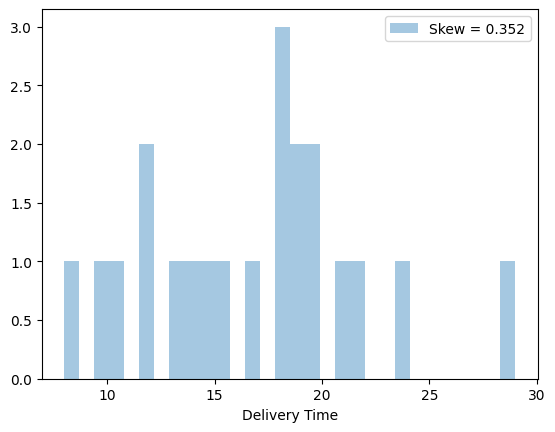

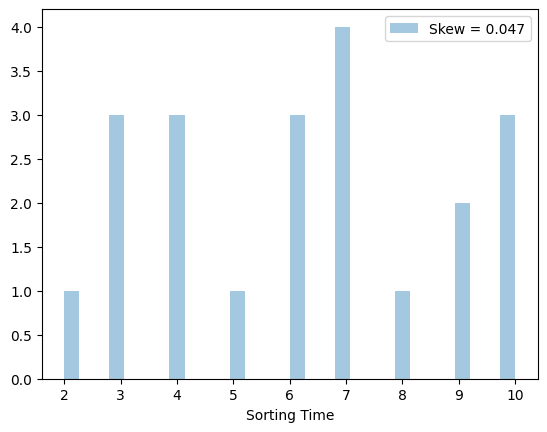

In [24]:
for i in numerical_features:
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

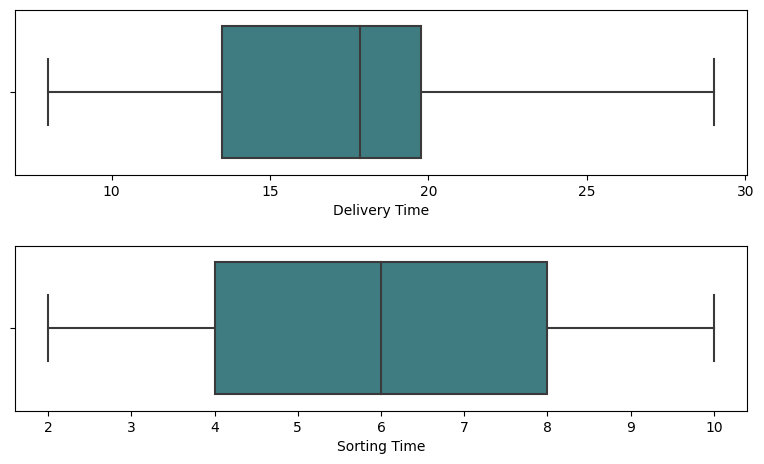

In [28]:
fig, axes = plt.subplots(2,1,figsize=(8,5),sharex=False,sharey=False)
sns.boxplot(x='Delivery Time', data= df,palette='crest',ax=axes[0])
sns.boxplot(x='Sorting Time',data= df,palette='crest',ax=axes[1])
plt.tight_layout(pad=2.0)

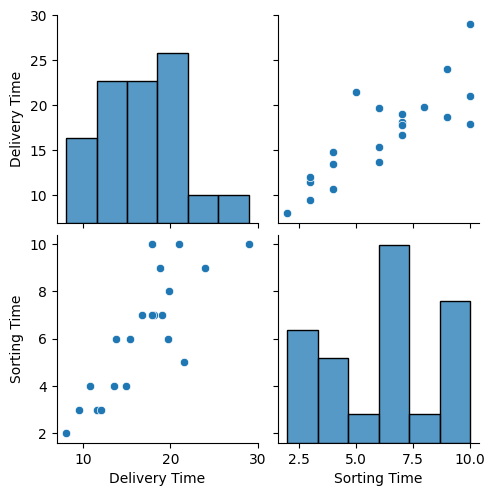

In [29]:
sns.pairplot(df, palette='coolwarm')
plt.show()

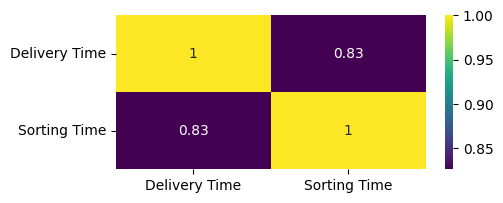

In [31]:
fig, ax = plt.subplots(figsize=(5,2))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

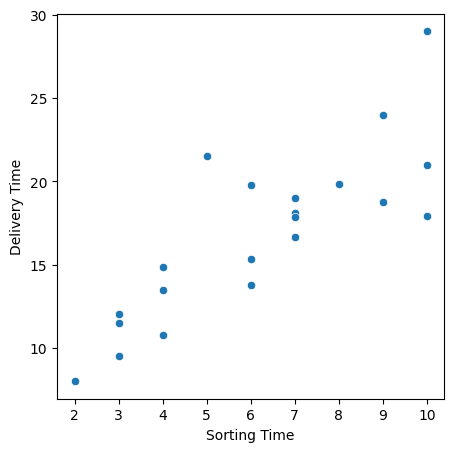

In [32]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=df,palette='Set1')

In [33]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Delivery Time', ylabel='Density'>

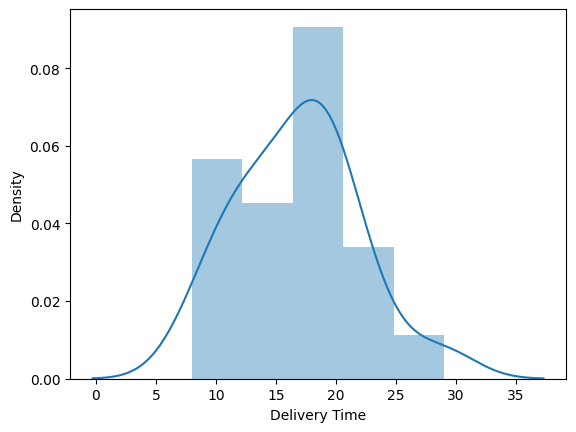

In [34]:
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

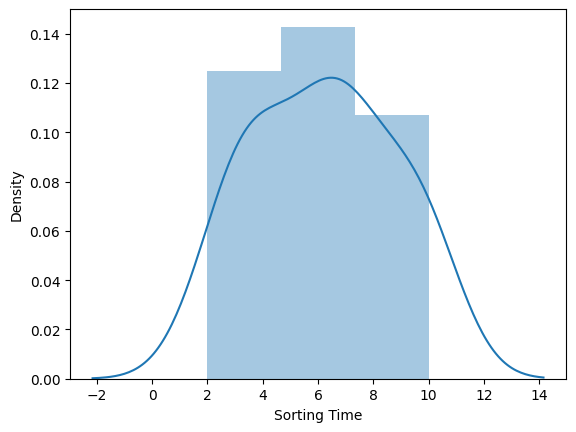

In [35]:
sns.distplot(df['Sorting Time'])

In [36]:
df.rename(columns={'Delivery Time':'DeliveryTime'},inplace=True)
df.rename(columns={'Sorting Time':'SortingTime'},inplace=True)
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [37]:
model=smf.ols("DeliveryTime ~ SortingTime",data=df).fit()

<Axes: xlabel='DeliveryTime', ylabel='SortingTime'>

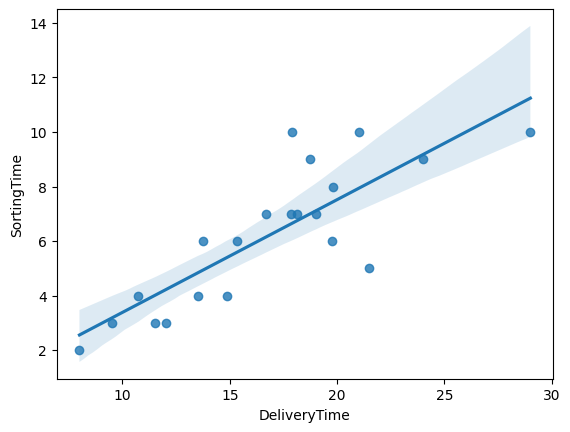

In [38]:
sns.regplot(x='DeliveryTime',y='SortingTime',data=df)

In [39]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [40]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [41]:
df['Predicted']=model.fittedvalues
df.head()

,DeliveryTime,SortingTime,Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [42]:
df['Error']=model.resid
df.head()

,DeliveryTime,SortingTime,Predicted,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067


In [43]:
df['Error_Sq']=(df['Error'])**2
df.head()

,DeliveryTime,SortingTime,Predicted,Error,Error_Sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124


In [44]:
Mean_Squared_Error=(df['Error_Sq']).mean()
Mean_Squared_Error

7.793311548584062

In [45]:
model.rsquared
#68.2% variation in the dependant variable is explained by the given independant variable

0.6822714748417231

In [46]:
model.pvalues
0.00000000000000000006016802

6.016802e-20

In [47]:
newdata=pd.Series([12,13,5,7])
df1=pd.DataFrame(newdata,columns=['SortingTime'])
df1

,SortingTime
0,12
1,13
2,5
3,7


In [51]:
model.predict(df1)

0    26.370973
1    28.019993
2    14.827833
3    18.125873
dtype: float64